In [1]:
import scipy as sp
import numpy as np
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

from bayesopt.search import *
from bayesopt.utils import *
from bayesopt.visualization import *

In [19]:
params = [{'learning_rate': v} for v in np.linspace(0.001, 1.0, 10)]
X = np.array([param['learning_rate'] for param in params]).reshape(-1, 1)

In [32]:
def target(x):
    return np.exp(-(x-3)**2) + np.exp(-(3*x-2)**2) + 1/(x**2+1)
rng = np.random.RandomState(0)
#y = target(X).reshape(-1)
y = target(X).reshape(-1) + 0.1 * rng.randn(len(X))

In [33]:
rng = np.random.RandomState(0)
kernel = Matern(nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel,
    n_restarts_optimizer=10,
    normalize_y=True,
    random_state=rng)
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=Matern(length_scale=1, nu=2.5),
                         n_restarts_optimizer=10, normalize_y=True,
                         optimizer='fmin_l_bfgs_b',
                         random_state=<mtrand.RandomState object at 0x1a1ee33d80>)

In [34]:
param_bounds = {'learning_rate': (0.001, 1.0)}
param_dists = bound_to_dist(param_bounds)

acq_kwargs = {'acq_func': expected_improvement,
              'pick_func': pick_argmax_acq,
              'n_candidates': 1000,
              'n_pick': 4}

In [35]:
bayes_scv = BayesianSearchCV(estimator=None,
                             param_distributions=param_dists,
                             acq_kwargs=acq_kwargs)

In [36]:
bayes_scv.set_initial_points(params, y)
bayes_scv._gp_fit(X, y)
bayes_scv.cv_results_ = None

/Users/jeongnna/github/bayesian-optimization/bayesopt/visualization.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


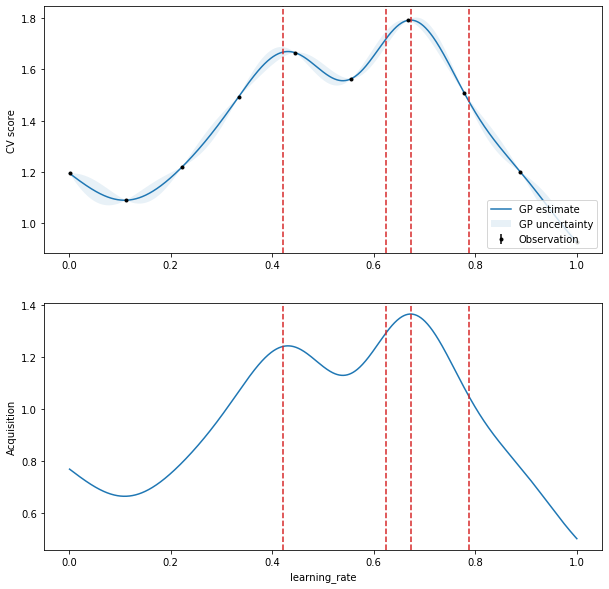

In [37]:
vis_acquisition(bayes_scv, 'learning_rate', step=10)